In [ ]:
%config Completer.use_jedi= False
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
# download dataset complete(V3)
!gdown --id '1V7cU9TVmdjLefjiKwpOlh1MIKSBKzk6y'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V7cU9TVmdjLefjiKwpOlh1MIKSBKzk6y
From (redirected): https://drive.google.com/uc?id=1V7cU9TVmdjLefjiKwpOlh1MIKSBKzk6y&confirm=t&uuid=c31ab835-37c1-4ad1-8ada-2ae26aae89c0
To: /content/Complete-ready-to-useV3.zip
100% 99.2M/99.2M [00:05<00:00, 16.6MB/s]


In [ ]:
#first directories
#datasets merupakan data yang sudah di balancing  dan resolusi gambar masih tidak seragam
destination_dir='./dataset'
zip_dir='/content/Complete-ready-to-useV3.zip'

In [ ]:
# Extract the zip file
with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

In [ ]:
new_destination=f"{os.path.join(destination_dir, 'Complete-ready-to-useV3')}"
classes=os.listdir(new_destination)
print(classes)

['Pear', 'Grape', 'Mangostan', 'Rambutan', 'Soursop', 'Papaya', 'Pineapple', 'Orange', 'Sapodilla', 'Dragonfruit', 'Langsat', 'Jackfruit', 'Watermelon', 'Durian', 'Strawberry', 'Banana', 'Avocado', 'Guava', 'Mango', 'Salak']


In [ ]:
def countDatainPath(path):
    dataX=np.zeros(len(os.listdir(path)))
    classes=os.listdir(path)

    #iterate for each class and find length of data
    for i,class_dir in enumerate(classes):
        source_class_dir=os.path.join(path,class_dir)
        dataX[i]=int(len(os.listdir(source_class_dir)))
        # print(dataX[i])
    return [dataX,classes]

source_data_images_dir=f"{new_destination}"
[dataX,dataY]=countDatainPath(source_data_images_dir)

print(len(dataX))

20


In [ ]:
dataX.sum()

16338.0

# splitting data

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders as sf
sf.ratio(source_data_images_dir,output="./clean_data1",seed=1337,ratio=(.7, .3))

Copying files: 16338 files [00:04, 3285.05 files/s]


In [ ]:
final_source_datasets='./clean_data1/'

In [ ]:
[train_dataX,train_dataY]=countDatainPath(f"{final_source_datasets}train/")
train_dataX.sum()

11430.0

In [ ]:
[val_dataX,val_dataY]=countDatainPath(f"{final_source_datasets}val/")

val_dataX.sum()

4908.0

([<matplotlib.patches.Wedge at 0x79d62e911bd0>,
 [Text(-0.6454339018423324, 0.8907385016673427, 'Train Data'),
  Text(0.6454339018423323, -0.8907385016673428, 'Validation Data')],
 [Text(-0.3520548555503631, 0.4858573645458232, '70%'),
  Text(0.35205485555036303, -0.4858573645458233, '30%')])

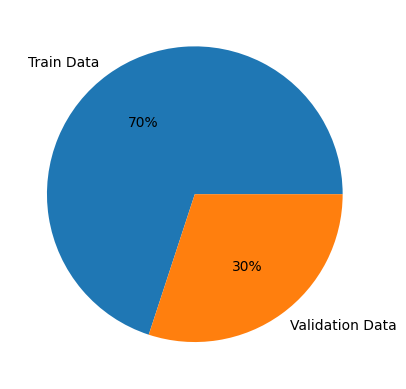

In [ ]:
plt.pie([train_dataX.sum(),val_dataX.sum()],labels=["Train Data","Validation Data"],autopct="%1.f%%")

In [ ]:
def calucationLen(path):
    destination_directory=final_source_datasets
    destination_directory1=destination_directory+path
    datay=np.zeros((len(classes)))
    datax=np.arange(0,len(classes),1)
    for i,class1 in enumerate(classes):
        class_source_dir=os.path.join(destination_directory1,class1)
        datay[i]=len(os.listdir(class_source_dir))
    # print()
    return [datax,datay]

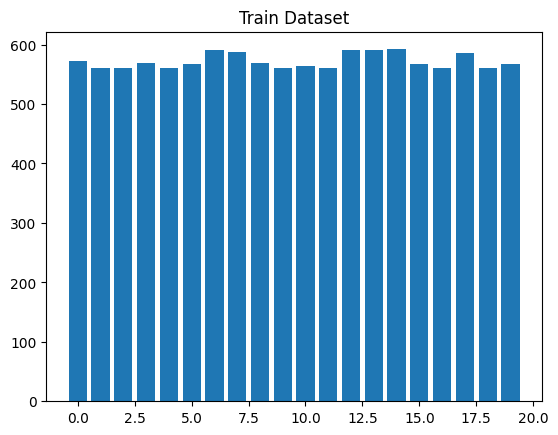

In [ ]:
dataTrain=calucationLen("train")
fig, ax = plt.subplots()
ax.bar (dataTrain[0],dataTrain[1])
ax.set_title ('Train Dataset');

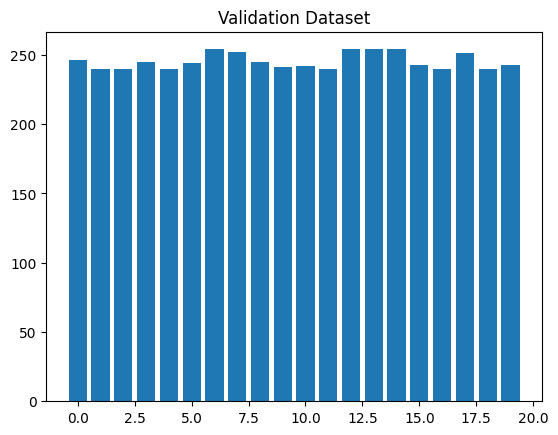

In [ ]:
dataTrain=calucationLen("val")
fig, ax = plt.subplots()
ax.bar (dataTrain[0],dataTrain[1])
ax.set_title ('Validation Dataset');

In [ ]:
target_size=(224,224)
path_trainning=f"{final_source_datasets}train/"
generateTrain=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                fill_mode='nearest') #preprocessing images #GATAU INI PERLU LAGI NGGA
dataTrain=generateTrain.flow_from_directory(
    path_trainning,
    target_size=target_size,
    class_mode="categorical",
    batch_size=64,
    color_mode='rgb',
    shuffle=True)  #TAMBAHANKU


Found 11430 images belonging to 20 classes.


## datasets already balanced

In [ ]:
#see  our labels
list(dataTrain.class_indices.keys())
# list(train_generator.class_indices.keys())

['Avocado',
 'Banana',
 'Dragonfruit',
 'Durian',
 'Grape',
 'Guava',
 'Jackfruit',
 'Langsat',
 'Mango',
 'Mangostan',
 'Orange',
 'Papaya',
 'Pear',
 'Pineapple',
 'Rambutan',
 'Salak',
 'Sapodilla',
 'Soursop',
 'Strawberry',
 'Watermelon']

In [ ]:
#added validation image while trainning
path_validate=f"{final_source_datasets}val/"
generateValidate=ImageDataGenerator(rescale=1./255) #preprocessing images
#generate validation
#Membuat membuat dataset gambar menjadi seragam dengan resolusi 227 * 227 pixel #MAKSUDNYA 224X224
dataValid=generateValidate.flow_from_directory(
    path_validate,
    target_size=target_size,
    class_mode="categorical",
     batch_size=64,
    color_mode='rgb',
    shuffle=True)   #TAMBAHANKU

Found 4908 images belonging to 20 classes.


Text(0.5, 1.0, 'Example Train Data')

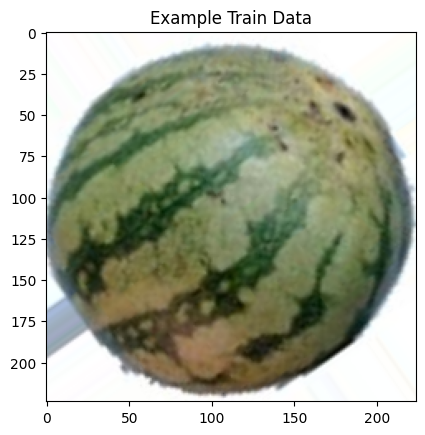

In [ ]:
#display img
iterator=iter(dataTrain)

# menampilkan gambar yang sudah di augmentasi serta sudah menerapkan pixel gambar menjadi 227 *227
image_batch, label_batch = next(iterator)
plt.imshow(image_batch[0])
plt.title("Example Train Data")

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
  if(logs.get('accuracy')>0.94):  #AKU UBAH KE 0.94
    print("\nReached 94% accuracy so cancelling training!")
    self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#TAMBAHANKU
tf.keras.backend.clear_session()

# Load the pre-trained ResNet50 model without the top layer
pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Optionally, freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Define the classifier function
def classifier(inputs):
    x = pretrained_model(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(20, activation="softmax", name="classification")(x) #TAMBAHANKU (AKU UBAH)
    return x

# Define and compile the model
def define_compile_model():
    input = tf.keras.Input(shape=(224, 224, 3))
    classification_output = classifier(input)
    model = tf.keras.Model(inputs=input, outputs=classification_output)

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and summarize the model
model = define_compile_model()
model.summary()



9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0        

In [ ]:
# #train my model

history=model.fit(
    dataTrain,
    epochs=50,
    validation_data=dataValid,
    callbacks=[callbacks],
)


# list(dataTrain.class_indices.keys())
# list(dataValid.class_indices.keys())



Epoch 1/50
179/179 [==============================] - 174s 897ms/step - loss: 1.5760 - accuracy: 0.8065 - val_loss: 0.1313 - val_accuracy: 0.9656
Epoch 2/50
179/179 [==============================] - 148s 827ms/step - loss: 0.3845 - accuracy: 0.9112 - val_loss: 0.1288 - val_accuracy: 0.9700
Epoch 3/50
179/179 [==============================] - 149s 830ms/step - loss: 0.3804 - accuracy: 0.9213 - val_loss: 0.1234 - val_accuracy: 0.9696
Epoch 4/50
179/179 [==============================] - 148s 827ms/step - loss: 0.4160 - accuracy: 0.9250 - val_loss: 0.1223 - val_accuracy: 0.9731
Epoch 5/50
179/179 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.9421
Reached 94% accuracy so cancelling training!
179/179 [==============================] - 151s 841ms/step - loss: 0.3243 - accuracy: 0.9421 - val_loss: 0.1455 - val_accuracy: 0.9698


In [ ]:

# Save the model you just trained
model.save("fruiteasyV3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# download the model
from google.colab import files
files.download("fruiteasyV3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

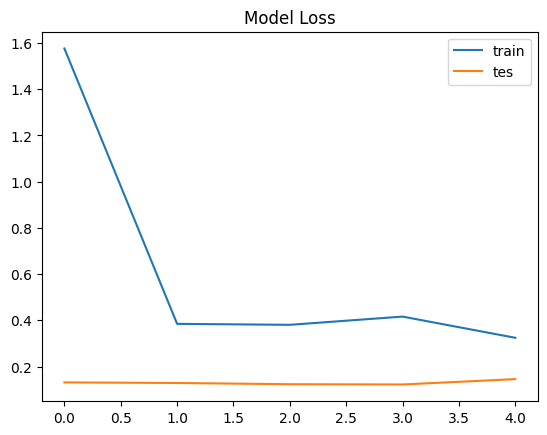

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['train',"tes"])

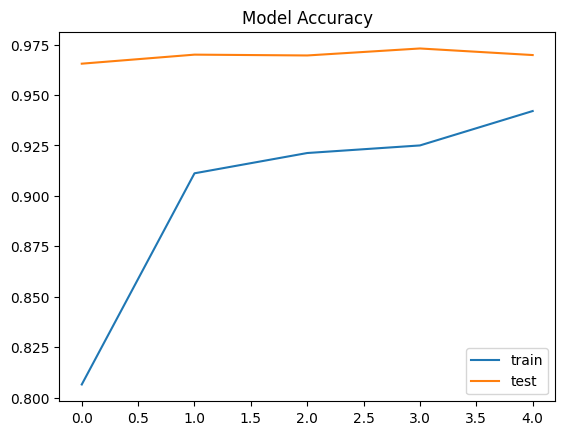

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['train',"test"])

In [ ]:
# print fruit dictionary
dataTrain.class_indices

{'Avocado': 0,
 'Banana': 1,
 'Dragonfruit': 2,
 'Durian': 3,
 'Grape': 4,
 'Guava': 5,
 'Jackfruit': 6,
 'Langsat': 7,
 'Mango': 8,
 'Mangostan': 9,
 'Orange': 10,
 'Papaya': 11,
 'Pear': 12,
 'Pineapple': 13,
 'Rambutan': 14,
 'Salak': 15,
 'Sapodilla': 16,
 'Soursop': 17,
 'Strawberry': 18,
 'Watermelon': 19}

In [ ]:
# load model from drive

from tensorflow.keras.models import load_model
pathModel="/content/fruiteasyV3.h5"
myModel=load_model(pathModel)
myModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                             

In [ ]:
#DEPRECATED

# def classData(array):
#   myLabels=list(dataTrain.class_indices.keys())
#   myFlattenArray=np.array(array).flatten()
#   values_decimal = np.array([float(val) for val in myFlattenArray])
#   total_sum = np.sum(values_decimal)
#   # Calculate percentages
#   percentages = (values_decimal / total_sum) * 100
#   print("OUTPUT PERCENTAGES FROM ALL CLASSES:")
#   for index,precentage in enumerate(percentages):
#       print(f"{myLabels[index]} : {precentage:.2f}%")
#       # Convert to decimal and calculate the total sum


# def outputCNN(imageData,predictImage):
#     testImg=image.load_img(path=imageData,target_size=(224,224))
#     x=image.img_to_array(testImg)
#     x=np.expand_dims(x,axis=0) #expand more array to three dimension

#     image_tensor=np.vstack([x]) #change to vertical
#     classes=myModel.predict(image_tensor)
#     print("my Bird Name : "+predictImage)
#     classData(classes)
#     # print(classes) #show predict base on image

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# download dataset test (262-for-test)
!gdown --id '1_YrDM73BvesGR0nmO_o4QUWv26yydfB4'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1_YrDM73BvesGR0nmO_o4QUWv26yydfB4
From (redirected): https://drive.google.com/uc?id=1_YrDM73BvesGR0nmO_o4QUWv26yydfB4&confirm=t&uuid=ddd03c40-8221-4c71-8dcd-71e256368216
To: /content/262-for-test.zip
100% 58.2M/58.2M [00:01<00:00, 38.8MB/s]


In [ ]:
# extract the test dataset
destination_test_dir='./testcuy'
zip_test_dir='/content/262-for-test.zip'

with zipfile.ZipFile(zip_test_dir, 'r') as zip_ref:
    zip_ref.extractall(destination_test_dir)

In [ ]:
from sklearn.utils import shuffle
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/testcuy/262",
    target_size=(224,224),
    class_mode="categorical",
    batch_size=32,
    color_mode='rgb',
    shuffle=False)

#get true labels
true_labels = test_generator.classes
test_generator.class_indices

Found 822 images belonging to 20 classes.


{'Avocado': 0,
 'Banana': 1,
 'Dragonfruit': 2,
 'Durian': 3,
 'Grape': 4,
 'Guava': 5,
 'Jackfruit': 6,
 'Langsat': 7,
 'Mango': 8,
 'Mangostan': 9,
 'Orange': 10,
 'Papaya': 11,
 'Pear': 12,
 'Pineapple': 13,
 'Rambutan': 14,
 'Salak': 15,
 'Sapodilla': 16,
 'Soursop': 17,
 'Strawberry': 18,
 'Watermelon': 19}

In [ ]:
test_predictions = myModel.predict(test_generator)

26/26 [==============================] - 5s 140ms/step


In [ ]:
confusion = confusion_matrix(true_labels, np.argmax(test_predictions, axis=-1))


In [ ]:
print("Classification Report:\n", classification_report(true_labels, np.argmax(test_predictions, axis=-1)))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       1.00      0.88      0.93        32
           2       1.00      1.00      1.00        40
           3       0.98      1.00      0.99        40
           4       1.00      0.95      0.97        40
           5       0.95      0.95      0.95        37
           6       0.93      1.00      0.96        41
           7       0.95      0.88      0.91        42
           8       0.72      0.95      0.82        38
           9       0.96      0.96      0.96        48
          10       0.98      1.00      0.99        40
          11       0.96      0.91      0.94        58
          12       1.00      0.80      0.89        40
          13       0.98      1.00      0.99        43
          14       1.00      1.00      1.00        44
          15       0.94      0.94      0.94        32
          16       0.96      0.94      0.95        48
   

In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import seaborn as sns
 #Define labels for the rows and columns
labels=list(test_generator.class_indices)
labels=[value.title() for value in labels]
columns=[''.join(char for char in input_String if char.isupper()) for input_String in labels]


# Create a table using tabulate
table = tabulate(confusion, headers=columns, showindex=labels, tablefmt="fancy_grid")

# Print the table
print(table)

╒═════════════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│             │   A │   B │   D │   D │   G │   G │   J │   L │   M │   M │   O │   P │   P │   P │   R │   S │   S │   S │   S │   W │
╞═════════════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ Avocado     │  33 │   0 │   0 │   0 │   0 │   0 │   2 │   0 │   1 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   1 │   0 │   0 │
├─────────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ Banana      │   1 │  28 │   0 │   0 │   0 │   0 │   0 │   0 │   3 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │   0 │
├─────────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ Dragonfruit │   0 │   0 │  40 │   0 │   0 │   

In [ ]:
reverse = {value: key for key, value in dataTrain.class_indices.items()}

Saving mangga3.jpg to mangga3 (5).jpg
1/1 [==============================] - 0s 23ms/step
0.9984536
8 Mango


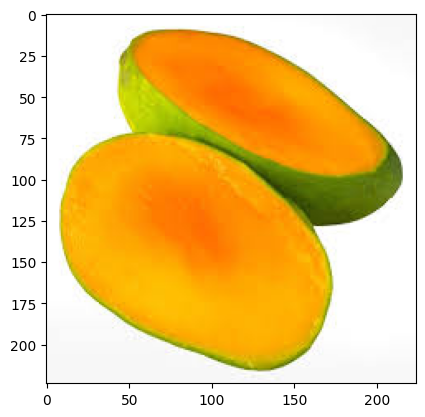

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224, 224))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # classes = model.predict(images, batch_size=10)
  classes = myModel.predict(images)

  # print(classes[0])
  plt.imshow(img)
  print(np.max(classes))
  print(np.argmax(classes), reverse.get(np.argmax(classes)))